# W207 Forest Cover  EDA

For the EDA, we have referenced other people's previous work:

https://www.kaggle.com/sharmasanthosh/exploratory-study-on-feature-selection

https://www.kaggle.com/vmathur/forest-cover-eda



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

# 0. Load Data

- Remove column "Id" since it has just serial numbers, not a feature useful for prediction

In [2]:
df_train = pd.read_csv('train.csv')             # read training data

df_train.drop('Id', axis=1, inplace=True)       # remove column 'Id'
df_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [7]:
num_features = df_train.columns[0:10]
num_features

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [8]:
cat_features = df_train.columns[11:]
cat_features

Index(['Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type'],
      dtype='object')

# 1. Data Statistics

## 1.1 Data Statistics

#### data shape

15250 rows with 55 features

In [9]:
print(df_train.shape)

(15120, 55)


#### data types

All features are int64

In [ ]:
print(df_train.dtypes)

#### statistical description

- No missing values. every row can be used.
- Vertical_Distance_To_Hydrology has negative values.
- Wilderness_Area and Soil_Type are one-hot encoded, they could be converted back for some analysis.
- Soil_Type7 and Soil_Type15 can be removed as they are constant (all zeros)
- Scales are not the same for all, rescaling and standardization may be helpful for some algorithms.


In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


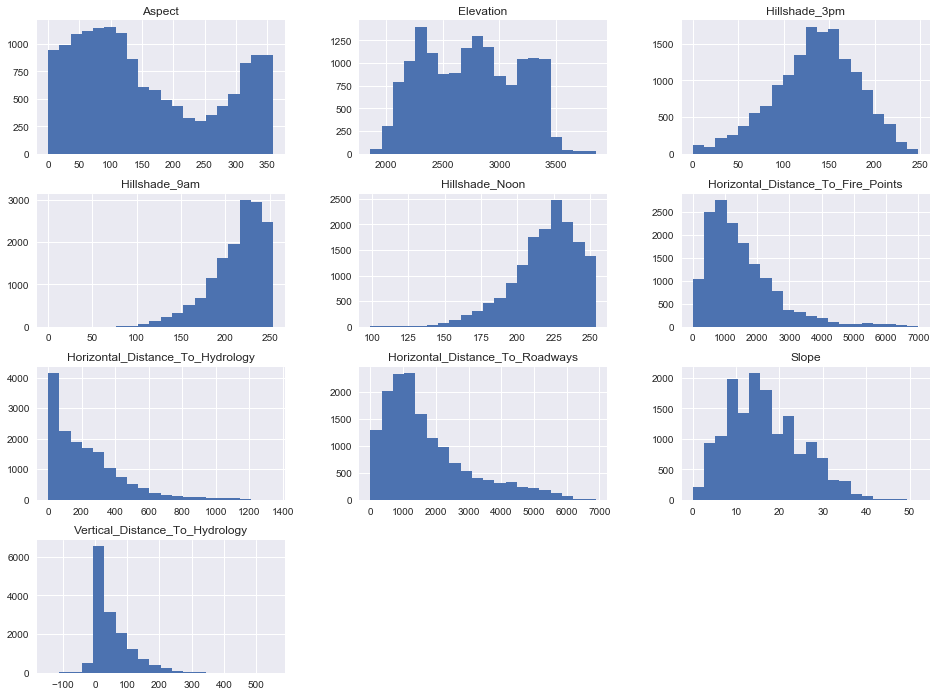

In [12]:
df_train[num_features].hist(figsize=(16,12), bins=20)
plt.show()

#### skew

- values close to 0 show less skew

- several features in Soil_Type show a large skew. Hence, some algorithms may benefit if skew corrected

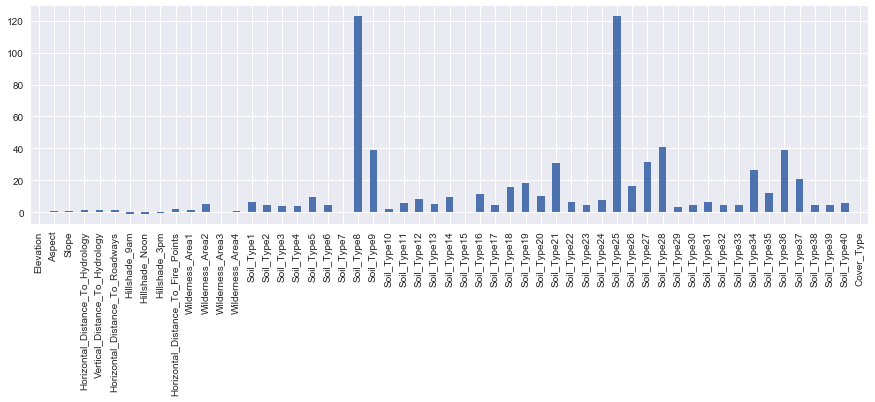

In [13]:
df_train.skew().plot(kind='bar', figsize=(15,4))
plt.show()

#### class distribution

- all classes have the same number, no class-rebalancing is necessary

In [14]:
df_train.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

## 1.2 Data Interaction

### correlation

- Correlation requires continuous data, ignore Wilderness_Area and Soil_Type here.

- strong correlation observed for following pairs, opportunity to reduce features

Hillshade_9am & Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology & Vertical_Distance_To_Hydrology = 0.65
Aspect & Hillshade_3pm = 0.64
Hillshade_Noon & Hillshade_3pm = 0.61
Slope & Hillshade_Noon = -0.61
Aspect & Hillshade_9am = -0.59
Elevation & Horizontal_Distance_To_Roadways = 0.58


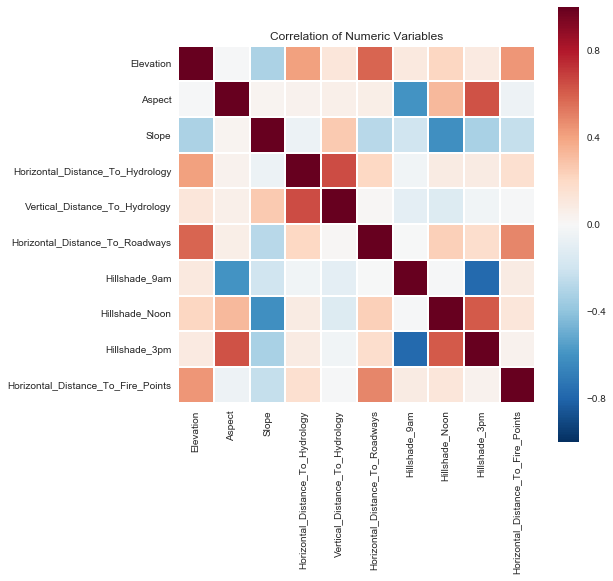

In [15]:
size = num_features.shape[0]         # size: 10 numeric features
num_data = df_train[num_features]    #  selecting numeric features

num_data_cor = num_data.corr()       # correlation matrix

cor_threshold = 0.5                  # threshold for selecting highly correlated features
num_data_cor_high = []               # list for pairs with cor > threshold

# search for highly correlated pairs
for i in range(0, size):
    for j in range(i+1, size):
        if abs(num_data_cor.iloc[i,j]) >= cor_threshold:                  
            num_data_cor_high.append([num_data_cor.iloc[i,j], i, j])  # store correlation
            
# sort to show high ones
num_data_cor_high_sorted = sorted(num_data_cor_high, key = lambda x: -abs(x[0]))

# print correlation and column names
for v, i, j in num_data_cor_high_sorted:
    print("{} & {} = {:.2f}".format(num_features[i], num_features[j], v))

# correlation heat map
fig, ax = plt.subplots(figsize=(8, 8))  
sns.heatmap(num_data_cor, square=True, linewidths=1)
plt.title('Correlation of Numeric Variables')
plt.show()

### scatterplot

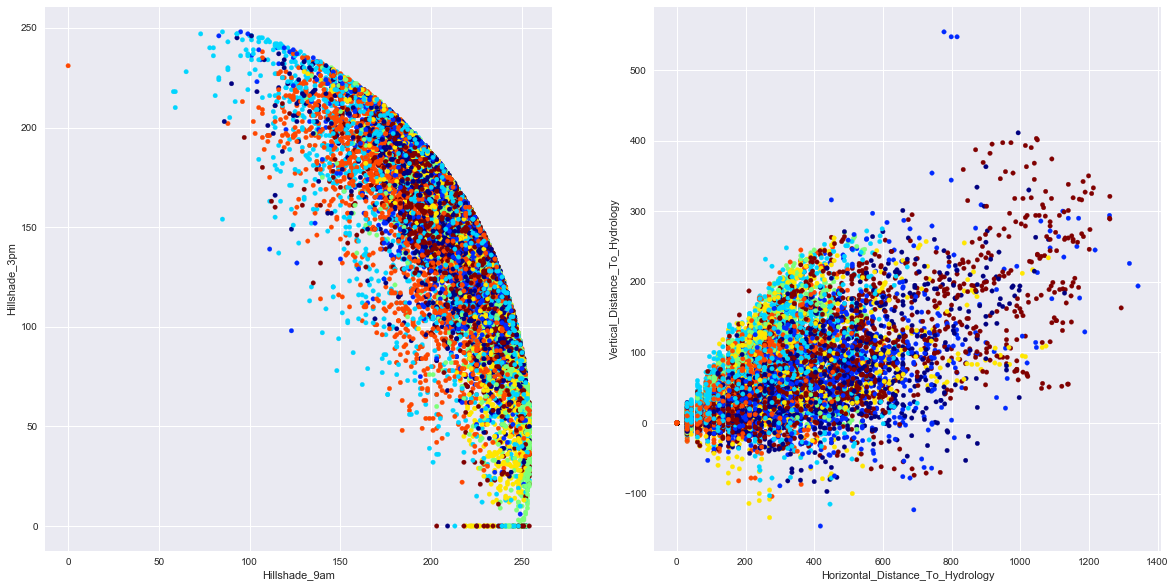

In [16]:
import matplotlib.cm as cm
cmap = cm.jet

labels = df_train.Cover_Type



fig, axes = plt.subplots(1, 2, figsize=(20,10))

df_train.plot(kind='scatter', x='Hillshade_9am', y='Hillshade_3pm', 
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[0])

df_train.plot(kind='scatter', x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', 
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[1])

plt.show()

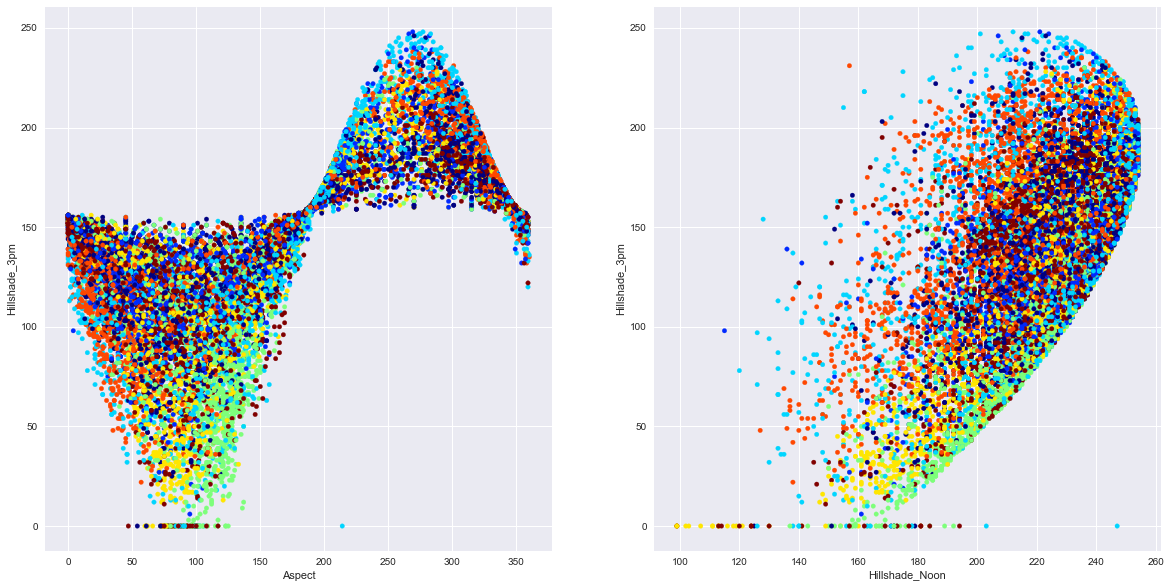

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

df_train.plot(kind='scatter', x='Aspect', y='Hillshade_3pm', 
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[0])

df_train.plot(kind='scatter', x='Hillshade_Noon', y='Hillshade_3pm', 
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[1])

plt.show()

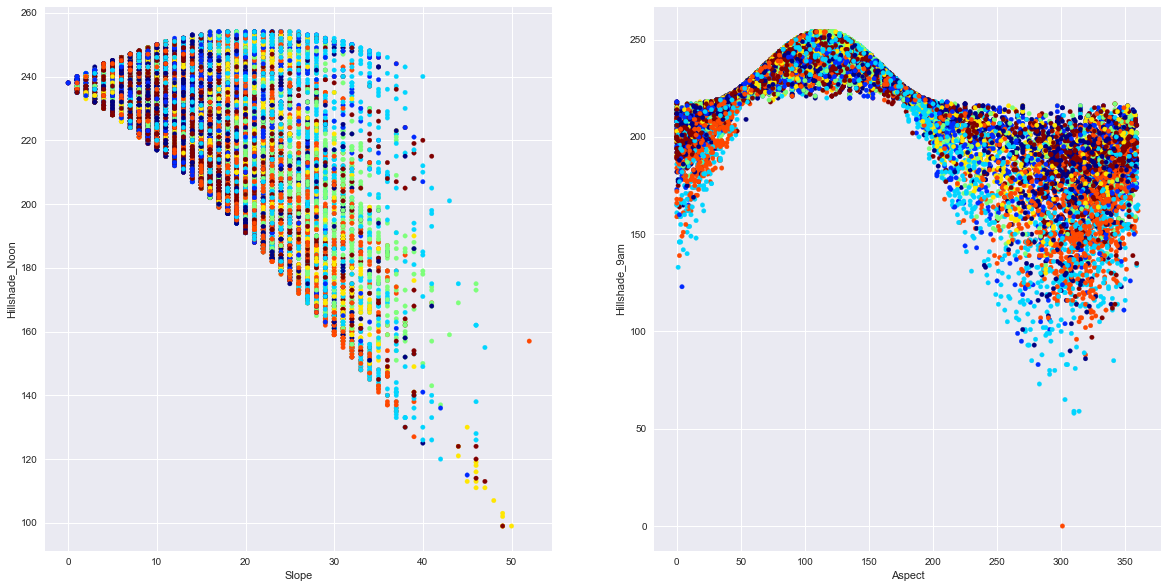

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

df_train.plot(kind='scatter', x='Slope', y='Hillshade_Noon',
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[0])

df_train.plot(kind='scatter', x='Aspect', y='Hillshade_9am', 
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[1])

plt.show()

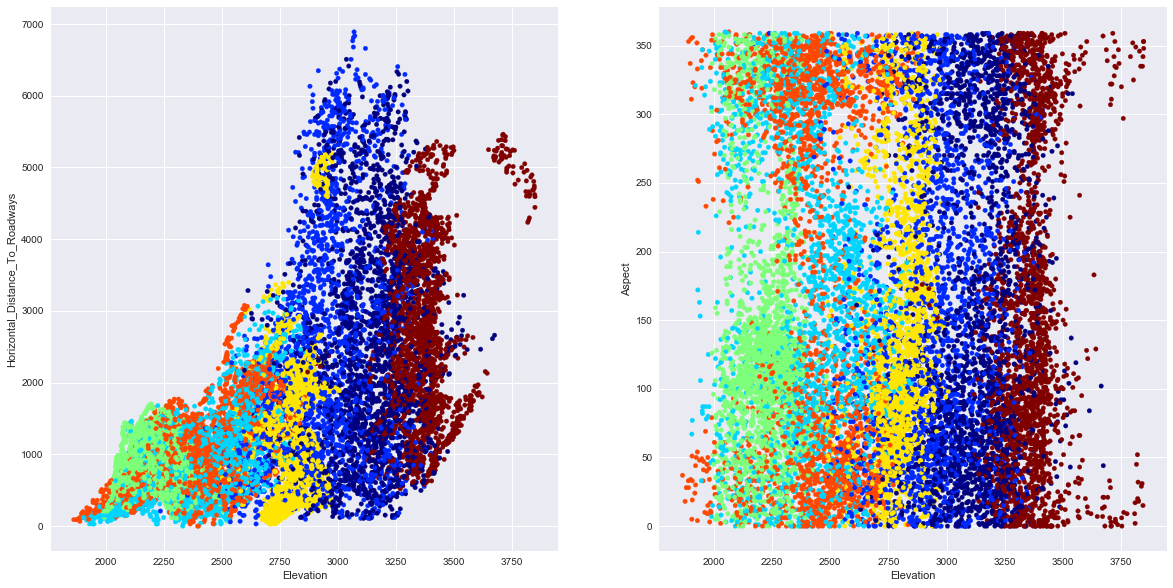

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

df_train.plot(kind='scatter', x='Elevation', y='Horizontal_Distance_To_Roadways',
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[0])

df_train.plot(kind='scatter', x='Elevation', y='Aspect', 
              marker='o', c=labels, cmap=cmap, colorbar=False, ax=axes[1])

plt.show()

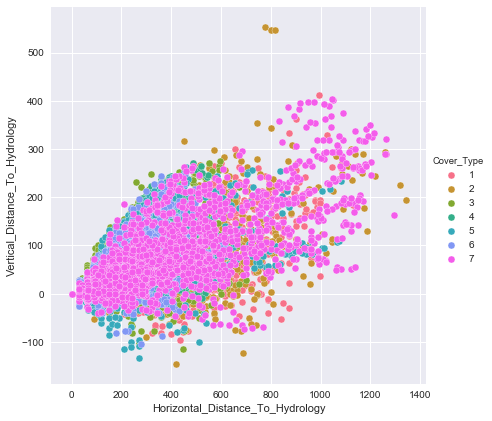

In [20]:
# sns plot looks nice
sns.pairplot(df_train, hue='Cover_Type', size=6, 
             x_vars='Horizontal_Distance_To_Hydrology', y_vars='Vertical_Distance_To_Hydrology')
plt.show()

## 1.3 Distributions 

### violinplot - continuous features

- combination of box plot and density plot
- use it on numeric features which have continuous distribution)

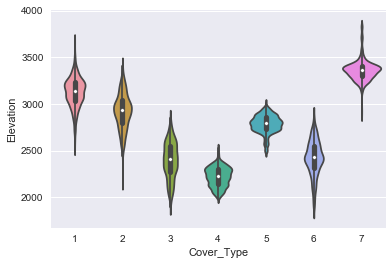

In [22]:
# use sns, x is the target, y is the values of attribute
sns.violinplot(data=df_train, x='Cover_Type', y='Elevation')
plt.show()

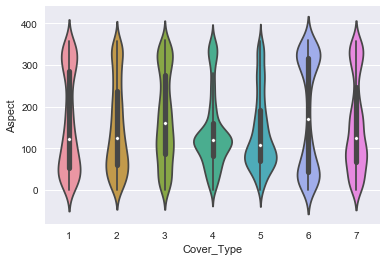

In [27]:
sns.violinplot(data=df_train, x='Cover_Type', y='Aspect')
plt.show()

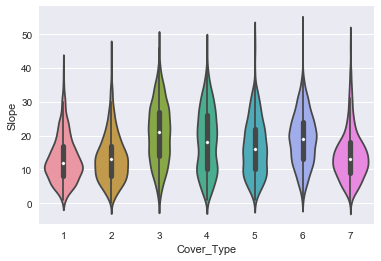

In [28]:
sns.violinplot(data=df_train, x='Cover_Type', y='Slope')
plt.show()

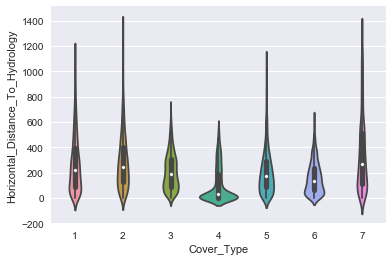

In [29]:
sns.violinplot(data=df_train, x='Cover_Type', y='Horizontal_Distance_To_Hydrology')
plt.show()

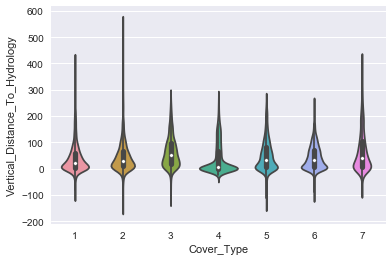

In [30]:
sns.violinplot(data=df_train, x='Cover_Type', y='Vertical_Distance_To_Hydrology')
plt.show()

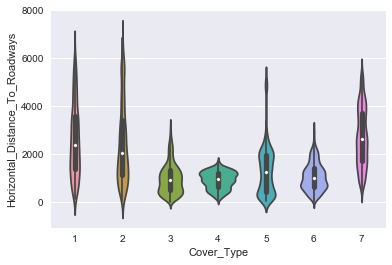

In [31]:
sns.violinplot(data=df_train, x='Cover_Type', y='Horizontal_Distance_To_Roadways')
plt.show()

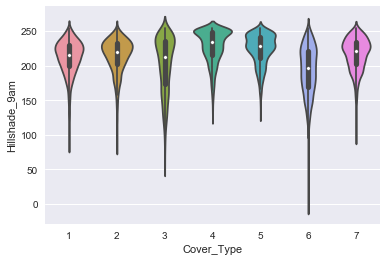

In [32]:
sns.violinplot(data=df_train, x='Cover_Type', y='Hillshade_9am')
plt.show()

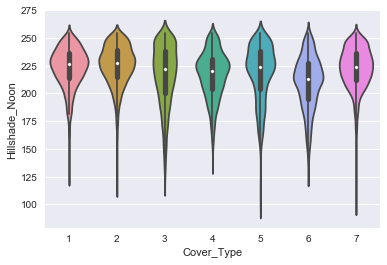

In [33]:
sns.violinplot(data=df_train, x='Cover_Type', y='Hillshade_Noon')
plt.show()

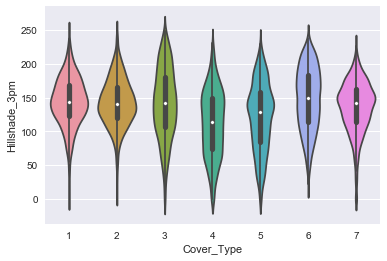

In [34]:
sns.violinplot(data=df_train, x='Cover_Type', y='Hillshade_3pm')
plt.show()

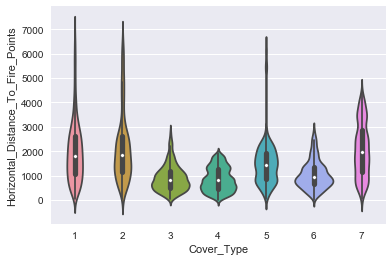

In [35]:
sns.violinplot(data=df_train, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points')
plt.show()

### barplot - wilderness area (categorical)

In [42]:
col_names = df_train.columns.tolist()

A = np.array(col_names)

soil_types = [item for item in A if "Soil" in item]
wilderness_areas = [item for item in A if "Wilderness_Area" in item]

Wilderness_Area1 3597
Wilderness_Area2 499
Wilderness_Area3 6349
Wilderness_Area4 4675


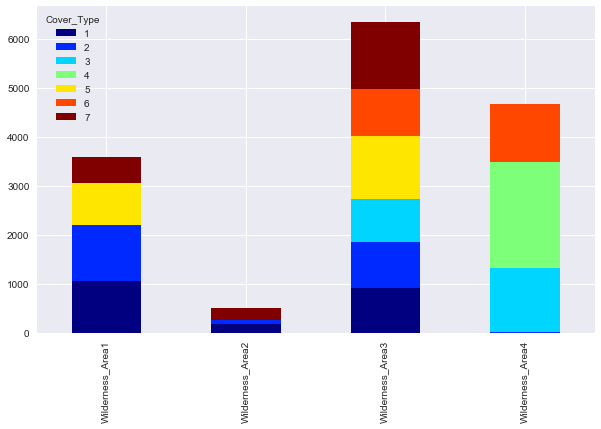

In [54]:
# Which wilderness_area support which cover_types?

for wilderness_area in wilderness_areas: print(wilderness_area, df_train[wilderness_area].sum())

wild_areas_sum = df_train[wilderness_areas].groupby(df_train['Cover_Type']).sum()
wild_areas_sum.T.plot(kind='bar', stacked=True, figsize=(10,6), cmap='jet')
plt.show()    

### barplot - soil type (categorical)

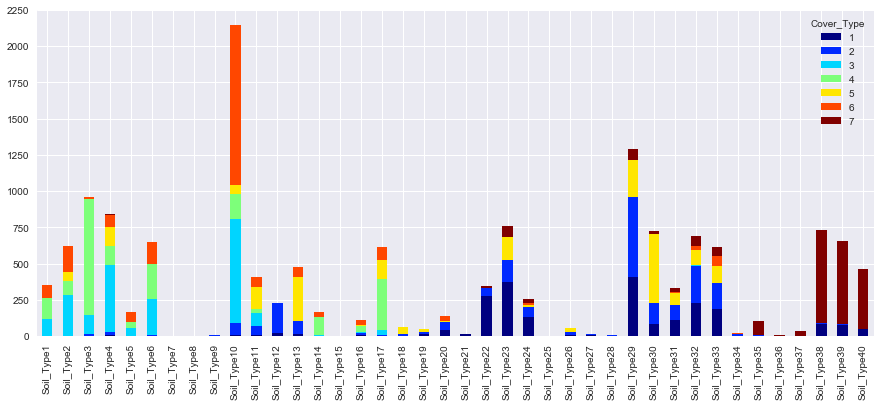

In [53]:
# Which soil_types support which cover_types?

# for soil_type in soil_types: print (soil_type, df_train[soil_type].sum())

types_sum = df_train[soil_types].groupby(df_train['Cover_Type']).sum()
types_sum.T.plot(kind='bar', stacked=True, figsize=(15,6), cmap='jet')
plt.show()

# 2. Feature Importance

- using a tree-based classifier to indentify feature importance for classification
- plot results

In [55]:
# 1: Split the df_train into a training set and a dev set
X_train, X_dev, Y_train, Y_dev = train_test_split(df_train.drop('Cover_Type',axis=1),
                                                df_train['Cover_Type'], test_size=0.2)


In [57]:
# 2: Try random forest.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 300, max_depth=15,min_samples_leaf=2)
clf.fit(X_train, Y_train)

print('Random Forest train score =', clf.score(X=X_train,y=Y_train))
print('Random Forest dev score =', clf.score(X=X_dev,y=Y_dev))

Random Forest train score = 0.9379133597883598
Random Forest dev score = 0.8303571428571429


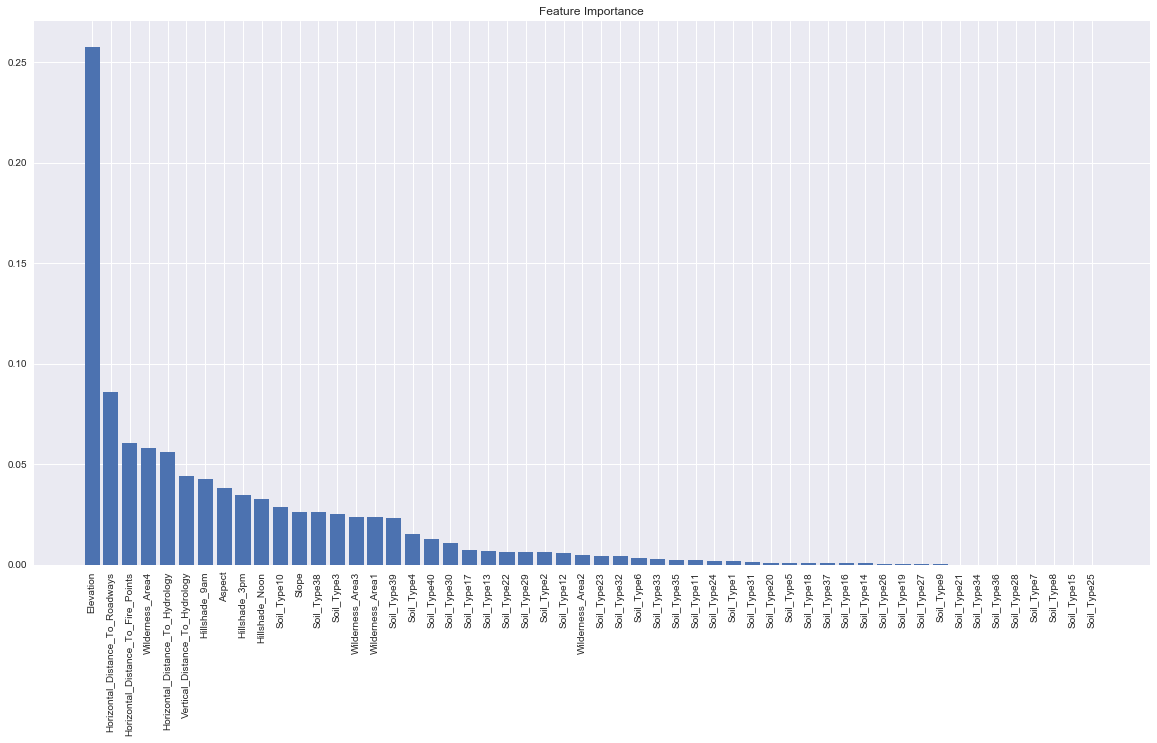

In [58]:
# 3: Get feature importance and plot results
featureImp = [(i, clf.feature_importances_[i]) for i in range(len(clf.feature_importances_))]
featureImp =sorted(featureImp,key=lambda x: x[1],reverse=True)
indList= [x[0] for x in featureImp]

plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.bar(range(len(clf.feature_importances_)), [x[1] for x in featureImp])
plt.xticks(range(len(clf.feature_importances_)),
           df_train.drop('Cover_Type',axis=1).columns[indList],rotation=90)
plt.show()